In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
pickleFile = './DMsimp_spin-0_Monojet_DF.pcl'
df = pd.read_pickle(pickleFile)

In [3]:
# print(df.columns)

In [4]:
dfAxialMonoJ = df[(df['Coupling'] == 'Axial') & (df['Mode'] == 'DM+QCDjets')]
dfVectorMonoJ = df[(df['Coupling'] == 'Vector') & (df['Mode'] == 'DM+QCDjets')]
dfScalarMonoJ = df[(df['Coupling'] == 'Scalar') & (df['Mode'] == 'DM+QCDjets')]
dfPseudoscalarMonoJ = df[(df['Coupling'] == 'Pseudoscalar') & (df['Mode'] == 'DM+QCDjets')]

In [5]:
dfPseudoscalarMonoJ

,Coupling,Mode,$m_{med}$,$m_{DM}$,$g_{DM}$,$g_{q}$,Data-takingperiod,Fullsample,Triggeremulation,$p_{T}^{miss}>250$GeV,...,bin_1090.0_1160.0_ErrorPlus,bin_1090.0_1160.0_ErrorMinus,bin_1160.0_1250.0,bin_1160.0_1250.0_ErrorPlus,bin_1160.0_1250.0_ErrorMinus,bin_1250.0_1400.0,bin_1250.0_1400.0_ErrorPlus,bin_1250.0_1400.0_ErrorMinus,Luminosity (1/fb),Total xsec-pT150 (pb)
4,Pseudoscalar,DM+QCDjets,10.0,1.0,1.0,1.0,2016,NaN,NaN,NaN,...,0.757590,-0.757590,0.34291,0.342910,-0.342910,1.21650,0.609360,-0.609360,36.0,NaN
104,Pseudoscalar,DM+QCDjets,10.0,1.0,1.0,1.0,2017,1.0,0.42481,0.071837,...,0.424580,-0.424580,0.89565,0.633840,-0.633840,0.87612,0.609590,-0.609590,41.5,4.364631
203,Pseudoscalar,DM+QCDjets,10.0,1.0,1.0,1.0,2018,1.0,0.37848,0.069298,...,0.792300,-0.792300,0.60181,0.601810,-0.601810,0.13015,0.130150,-0.130150,59.7,4.395769
5,Pseudoscalar,DM+QCDjets,10.0,4.0,1.0,1.0,2016,NaN,NaN,NaN,...,0.537030,-0.537030,1.27250,0.636960,-0.636960,0.26549,0.194980,-0.194980,36.0,NaN
105,Pseudoscalar,DM+QCDjets,10.0,4.0,1.0,1.0,2017,1.0,0.42423,0.071375,...,0.609710,-0.609710,0.90165,0.639430,-0.639430,0.42669,0.426690,-0.426690,41.5,4.391365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Pseudoscalar,DM+QCDjets,700.0,1.0,1.0,1.0,2017,1.0,0.70783,0.331170,...,0.041947,-0.041947,0.27017,0.035313,-0.035313,0.29457,0.037139,-0.037139,41.5,0.054702
222,Pseudoscalar,DM+QCDjets,700.0,1.0,1.0,1.0,2018,1.0,0.67941,0.329680,...,0.059003,-0.059003,0.37246,0.051949,-0.051949,0.41745,0.055014,-0.055014,59.7,0.055569
24,Pseudoscalar,DM+QCDjets,800.0,1.0,1.0,1.0,2016,NaN,NaN,NaN,...,0.020855,-0.020855,0.17397,0.018789,-0.018789,0.24293,0.022047,-0.022047,36.0,NaN
124,Pseudoscalar,DM+QCDjets,800.0,1.0,1.0,1.0,2017,1.0,0.72145,0.357200,...,0.025137,-0.025137,0.19303,0.022354,-0.022354,0.20421,0.022418,-0.022418,41.5,0.027736


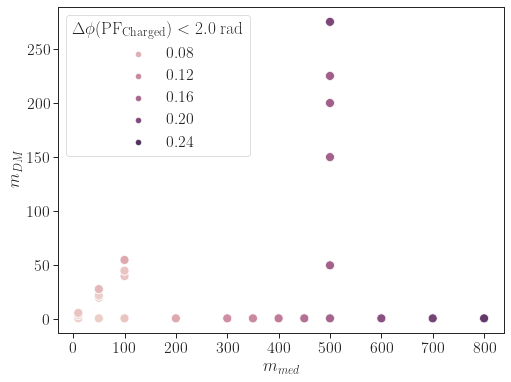

In [6]:
plt.figure(figsize=(8,6))
p =sns.scatterplot(data=dfPseudoscalarMonoJ,x='$m_{med}$', y='$m_{DM}$',
                hue='$\Delta \phi (\mathrm{PF}_\mathrm{Charged})<2.0$ rad',s=80)


In [9]:
dfPseudoscalarMonoJ[(dfPseudoscalarMonoJ['$m_{med}$'] == 500.) 
             & (dfPseudoscalarMonoJ['$m_{DM}$'] == 1.) 
             & (dfPseudoscalarMonoJ['Data-takingperiod'] == 2017)][[c for c in dfPseudoscalarMonoJ.columns if not 'bin_' in c]].T

,113
Coupling,Pseudoscalar
Mode,DM+QCDjets
$m_{med}$,500.0
$m_{DM}$,1.0
$g_{DM}$,1.0
$g_{q}$,1.0
Data-takingperiod,2017
Fullsample,1.0
Triggeremulation,0.66673
$p_{T}^{miss}>250$GeV,0.26638


In [11]:
massPairs = set([])
for irow,row in dfPseudoscalarMonoJ.iterrows():
    mDM = row['$m_{DM}$']
    mMed = row['$m_{med}$']
    massPairs.add((mDM,mMed))
massPairs = sorted(list(massPairs))
print(len(massPairs))
print(massPairs)

25
[(1.0, 10.0), (1.0, 50.0), (1.0, 100.0), (1.0, 200.0), (1.0, 300.0), (1.0, 350.0), (1.0, 400.0), (1.0, 450.0), (1.0, 500.0), (1.0, 600.0), (1.0, 700.0), (1.0, 800.0), (4.0, 10.0), (6.0, 10.0), (20.0, 50.0), (22.0, 50.0), (28.0, 50.0), (40.0, 100.0), (45.0, 100.0), (50.0, 500.0), (55.0, 100.0), (150.0, 500.0), (200.0, 500.0), (225.0, 500.0), (275.0, 500.0)]
